# Preprocessing and Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:\\Users\\nicol\\auto_mpg_modified.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8.0,307.0,130.0,3504,12.0,70,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693,11.5,70,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436,11.0,70,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433,12.0,70,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449,10.5,70,1.0,ford torino


-removing origin because the relationship between origin and mpg is unclear <br/>
-removing name because name should not have as much predicitive value for mps in comparison to other predictor variables (such as displacement, horsepower, etc.)<br/>
-replacing missing values using a data imputation method

In [2]:
def data_preprocessing (df):
    df.drop('origin', axis = 1, inplace= True) 
    df.drop('name', axis = 1, inplace= True)                 
       
    min = df['horsepower'].mean() - df['horsepower'].std()
    max = df['horsepower'].mean() + df['horsepower'].std()
    imp_horse = list(np.random.randint(min, max, size = 1))

    df.loc[df['horsepower'].isnull(), 'horsepower'] = imp_horse
    df['horsepower'] = df['horsepower'].astype(float)
    
    min = df['mpg'].mean() - df['mpg'].std()
    max = df['mpg'].mean() + df['mpg'].std()
    imp_mpg = list(np.random.randint(min, max, size = 1))

    df.loc[df['mpg'].isnull(), 'mpg'] = imp_mpg
    df['mpg'] = df['mpg'].astype(float)
    
    min = df['cylinders'].mean() - df['cylinders'].std()
    max = df['cylinders'].mean() + df['cylinders'].std()
    imp_cylinders = list(np.random.randint(min, max, size = 1))

    df.loc[df['cylinders'].isnull(), 'cylinders'] = imp_cylinders 
    df['cylinders'] = df['cylinders'].astype(int)
    
    min = df['displacement'].mean() - df['displacement'].std()
    max = df['displacement'].mean() + df['displacement'].std()
    imp_displacement = list(np.random.randint(min, max, size = 1))

    df.loc[df['displacement'].isnull(), 'displacement'] = imp_displacement
    df['displacement'] = df['displacement'].astype(float)
    
    min = df['weight'].mean() - df['weight'].std()
    max = df['weight'].mean() + df['weight'].std()
    imp_weight = list(np.random.randint(min, max, size = 1))

    df.loc[df['weight'].isnull(), 'weight'] = imp_weight
    df['weight'] = df['weight'].astype(float)
    
    min = df['acceleration'].mean() - df['acceleration'].std()
    max = df['acceleration'].mean() + df['acceleration'].std()
    imp_acceleration = list(np.random.randint(min, max, size = 1))

    df.loc[df['acceleration'].isnull(), 'acceleration'] = imp_acceleration
    df['acceleration'] = df['acceleration'].astype(float)
    
    min = df['year'].mean() - df['year'].std()
    max = df['year'].mean() + df['year'].std()
    imp_year = list(np.random.randint(min, max, size = 1))

    df.loc[df['year'].isnull(), 'year'] = imp_year
    df['year'] = df['year'].astype(int)
    
    return df
                    
df_clean = data_preprocessing(df)
df_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


Preparing features and response dataframes

In [3]:
response = pd.DataFrame(df.mpg)
features = df.iloc[:, 1:7]

In [5]:
from sklearn.model_selection import train_test_split
#breaking data into train and test data and assigning them to their corresponding dataframes
my_result_list = train_test_split(features, response, test_size=0.2, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

In [10]:
#assessing length of each dataframe
print("Number of total rows in complete features dataframe: ", len(features))
print("Number of total rows in features_train dataframe: ", len(features_train))
print("Number of total rows in features_test dataframe: ", len(features_test))
print("Number of total rows in complete response dataframe: ", len(response))
print("Number of total rows in response_train dataframe: ", len(response_train))
print("Number of total rows in response_test dataframe: ", len(response_test))

Number of total rows in complete features dataframe:  398
Number of total rows in features_train dataframe:  318
Number of total rows in features_test dataframe:  80
Number of total rows in complete response dataframe:  398
Number of total rows in response_train dataframe:  318
Number of total rows in response_test dataframe:  80


Creating a multiple linear regression model and fitting it to our train data

In [11]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Generating predictions for our test data

In [12]:
response_pred = my_linear_regression.predict(features_test)

Generating a scatterplot to visualize predictions versus actuals

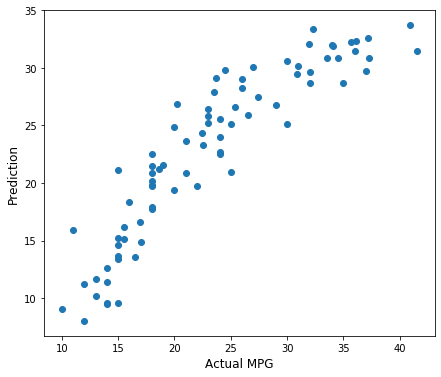

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.scatter(response_test, response_pred)
plt.ylabel('Prediction', size = 12)
plt.xlabel('Actual MPG', size = 12)
plt.show()

Assessing our model's metrics

In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))

Mean Absolute Error: 2.710317892564791
Mean Squared Error: 11.529982298873666
Root Mean Squared Error: 3.3955827627777926


Normalizing our cleaned data using minmaxscaler

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_normalized = scaler.fit_transform(df_clean)
df_normalized = pd.DataFrame(data_normalized, columns = df_clean.columns.to_list())

Fitting a multiple linear regression model to our normalized data

In [17]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
features = df_normalized.iloc[:,1:7] 
response = df_normalized[['mpg']]
my_linear_regression.fit(features, response)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Assessing feature importance for the normalized model and summarizing them in a bar chart

In [18]:
importance = my_linear_regression.coef_[0]
feature_names = df_normalized.columns.to_list()
feature_names.remove('mpg')
# summarize feature importance
for i, score in enumerate(importance):
    print('%s: %.5f' % (feature_names[i], score))

cylinders: -0.04526
displacement: 0.08545
horsepower: 0.00919
weight: -0.65337
acceleration: 0.04044
year: 0.24176


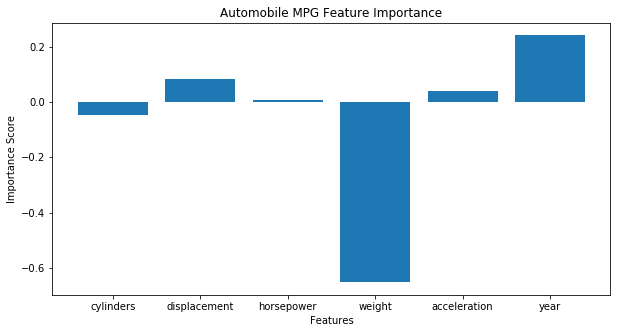

In [19]:
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Automobile MPG Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()

Dropping the two lowest features from our dataset (horsepower and acceleration). 

In [20]:
df_clean.drop('horsepower', axis = 1, inplace= True) 
df_clean.drop('acceleration', axis = 1, inplace= True)   

In [22]:
#creating features and response DFs with our new data.
response = pd.DataFrame(df_clean.mpg)
features = df_clean.iloc[:, 1:5]

In [23]:
from sklearn.model_selection import train_test_split
my_result_list = train_test_split(features, response, test_size=0.2, random_state=0)

features_train = my_result_list[0]
features_test = my_result_list[1]
response_train = my_result_list[2]
response_test = my_result_list[3]

In [24]:
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()
my_linear_regression.fit(features_train, response_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
response_pred = my_linear_regression.predict(features_test)

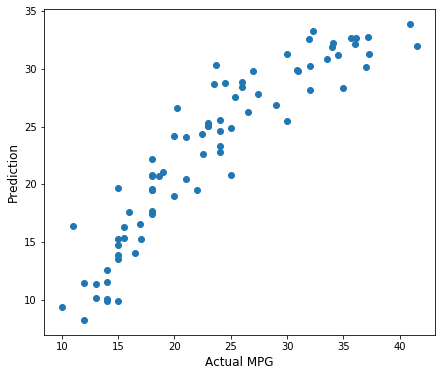

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))
plt.scatter(response_test, response_pred)
plt.ylabel('Prediction', size = 12)
plt.xlabel('Actual MPG', size = 12)
plt.show()

In [28]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(response_test, response_pred))
print('Mean Squared Error:', metrics.mean_squared_error(response_test, response_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(response_test, response_pred)))

Mean Absolute Error: 2.5689751860757064
Mean Squared Error: 10.433093300449064
Root Mean Squared Error: 3.2300299225315334


# Metric Comparison

Original:

Mean Absolute Error: 2.7165610346659896

Mean Squared Error: 11.635241105371142

Root Mean Squared Error: 3.411046922188427

After dropping lowest importance (2):

Mean Absolute Error: 2.569535993047778

Mean Squared Error: 10.43525109417094

Root Mean Squared Error: 3.2303639259642156


All error metrics (MAE, MSE, and RMSE) decreased after removing acceleration and horsepower, the features of lowest importance. This may indicate that these two features have little predictive value on our outcome variable, mpg, and thus account for less variance in mpg. 